In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
from typing import Dict, Tuple, Set, Callable


def grouper(input: Dict[Tuple[str, ...],pd.DataFrame],
            keys: Tuple[str, ...]) -> Dict[Tuple[str, ...], pd.DataFrame]:
    """
    Helper function for recursive grouping dict of pandas DataFrames.
    """
    if not keys:
        return input

    to_tuple_transformer: Callable = lambda element: element if isinstance(element, tuple) else (element, )

    grouped_df: Dict[Tuple[str, ...], pd.DataFrame] = {
        (next_key, *to_tuple_transformer(curr_key)): next_df
        for curr_key, curr_df in input.items()
        for next_key, next_df in curr_df.groupby(keys[-1])
    }

    return grouper(grouped_df, keys[:-1])


def group(input: pd.DataFrame, output: pd.DataFrame,
          keys: Tuple[str, ...] = ("engine_family", "flight_phase")) -> Dict[Tuple[str, ...], pd.DataFrame]:
    """
    Mock function for maintenance characteristics prediction.
    :param input: input DataFrame of aircraft and engine characteristics.
    :param keys: keys that are used for grouping output data.
    :return: output groups of DataFrames of predicted maintenance characteristics.
    """
    # TODO: add model prediction instead of valid data
    sub_input_keys: Set[str, ...] = {"engine_id", "flight_datetime", "flight_phase", *keys}
    sub_input: pd.DataFrame = input[list(sub_input_keys)]
    df: pd.DataFrame = pd.merge(sub_input, output, on=["engine_id", "flight_datetime", "flight_phase"])
    phase_df: Dict = {k: v for k, v in df.groupby(keys[-1])}

    return grouper(phase_df, keys[:-1])

In [9]:
X = pd.read_csv('drive/MyDrive/Colab Notebooks/mm/r&d/X.csv')
y = pd.read_csv('drive/MyDrive/Colab Notebooks/mm/r&d/y.csv')

In [15]:
splitted_datasets = group(X, y, ("flight_phase", "engine_family"))

In [44]:
def validate(df):
    return df.dropna(axis='columns', thresh=20).dropna()

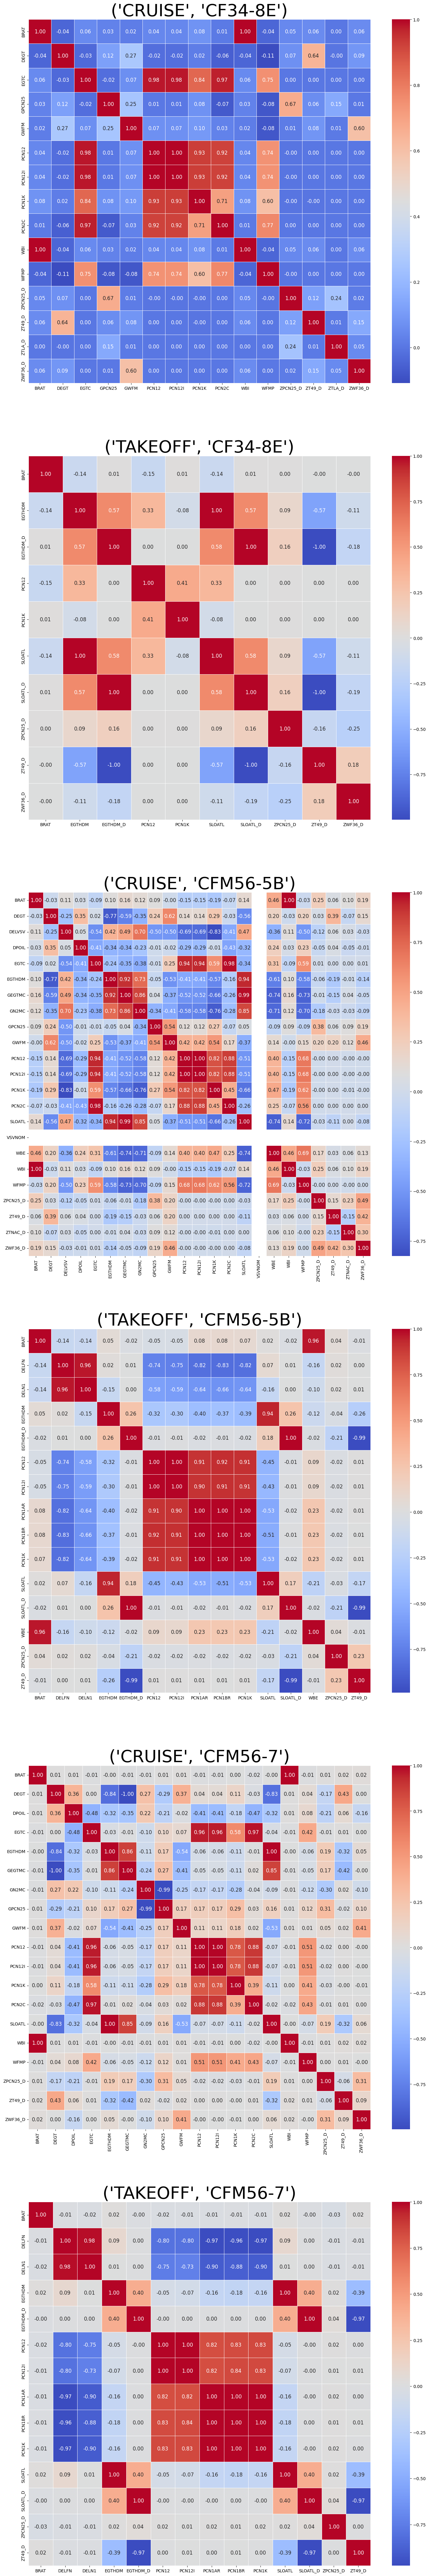

In [65]:
f, ax = plt.subplots(len(splitted_datasets.keys()), 1, figsize=(18, 108))

for i, (key, df) in enumerate(splitted_datasets.items()):
    val_df = validate(df)
    sns.heatmap(val_df.corr(), annot=True, annot_kws={'size': 12}, linewidths=.5, fmt= '.2f', cmap="coolwarm", ax=ax[i])
    ax[i].set_title(str(key), fontsize=40)
plt.show()

В таблице для случая ("CRUISE", "CFM56-5B") параметр VSVNOM имеет белые строки, потому что значение этих парметров для данного случая ВСЕГДА равны 0.0, а значит дисперсия 0, а в формуле корреляции происходит деление на корень из произведения дисперсий, т.е. на ноль, отсюда и неправильная отрисовка.

In [64]:
dff = validate(splitted_datasets[("CRUISE", "CFM56-5B")])
print(len(dff[['VSVNOM']]))
print(len(dff[dff.VSVNOM == 0.0]))

21893
21893
